There are total of 9 tables being generated in this colab notebook. Among the 9 tables, 4 tables are from the 'climate change data' and 5 tables are from the 'world bank data'.
Ref: 

1.   https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
2.   https://www.kaggle.com/datasets/theworldbank/world-bank-climate-change-data


# 1. Required packages

In [ ]:
import zipfile
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import missingno as msno
from tabulate import tabulate
import xlrd

In [ ]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 8.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# 2. Upload Kaggle Key

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devbhy","key":"ab380ec74904446a323e065fd6ac1b76"}'}

# 3 Data Download

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data
!kaggle datasets download -d theworldbank/world-bank-climate-change-data

 87% 74.0M/84.7M [00:00<00:00, 142MB/s]
100% 84.7M/84.7M [00:00<00:00, 135MB/s]
 80% 34.0M/42.4M [00:00<00:00, 115MB/s] 
100% 42.4M/42.4M [00:00<00:00, 101MB/s]


In [ ]:
!mkdir /content/climate_change_data
!mkdir /content/world_bank_data
!unzip /content/climate-change-earth-surface-temperature-data.zip -d /content/climate_change_data
!unzip /content/world-bank-climate-change-data.zip -d /content/world_bank_data

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: /content/climate_change_data/GlobalLandTemperaturesByCity.csv  
  inflating: /content/climate_change_data/GlobalLandTemperaturesByCountry.csv  
  inflating: /content/climate_change_data/GlobalLandTemperaturesByMajorCity.csv  
  inflating: /content/climate_change_data/GlobalLandTemperaturesByState.csv  
  inflating: /content/climate_change_data/GlobalTemperatures.csv  
Archive:  /content/world-bank-climate-change-data.zip
  inflating: /content/world_bank_data/climate-change-excel-4-6-mb-.xls  
  inflating: /content/world_bank_data/country-projections/cckp_ensemble_projections.xlsx  
  inflating: /content/world_bank_data/historical-data-excel-380-kb-.xls  
  inflating: /content/world_bank_data/temp-averages-shp-32mb-/DOCUMENTATION.txt  
  inflating: /content/world_bank_data/temp-averages-shp-32mb-/avg_tas_a2_2020_2039.dbf  
  inflating: /content/world_bank_data/temp-averages-shp-32mb-/avg_tas_a2_2020_2039.p

# 4-1. Climate Change Data 

## EDA

In [ ]:
GlobalTempCity_df = pd.read_csv('/content/climate_change_data/GlobalLandTemperaturesByCity.csv')
GlobalTempCountry_df = pd.read_csv('/content/climate_change_data/GlobalLandTemperaturesByCountry.csv')
GlobalTempMajorCity_df = pd.read_csv('/content/climate_change_data/GlobalLandTemperaturesByMajorCity.csv')
GlobalTempState_df = pd.read_csv('/content/climate_change_data/GlobalLandTemperaturesByState.csv')

In [ ]:
aset = set(GlobalTempCountry_df.Country)

In [ ]:
GlobalTempCity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
GlobalTempCity_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [ ]:
GlobalTempCity_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
GlobalTempCity_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,imputed,year,month,day
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068,1743,11,01
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.788,1743,12,01
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.788,1744,01,01
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.788,1744,02,01
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,5.788,1744,03,01


In [ ]:
def show_graph(df, col,range1, range2):
  figure(figsize=(12, 10), dpi=80)
  df[col][range1:range2].plot(marker = 'o')

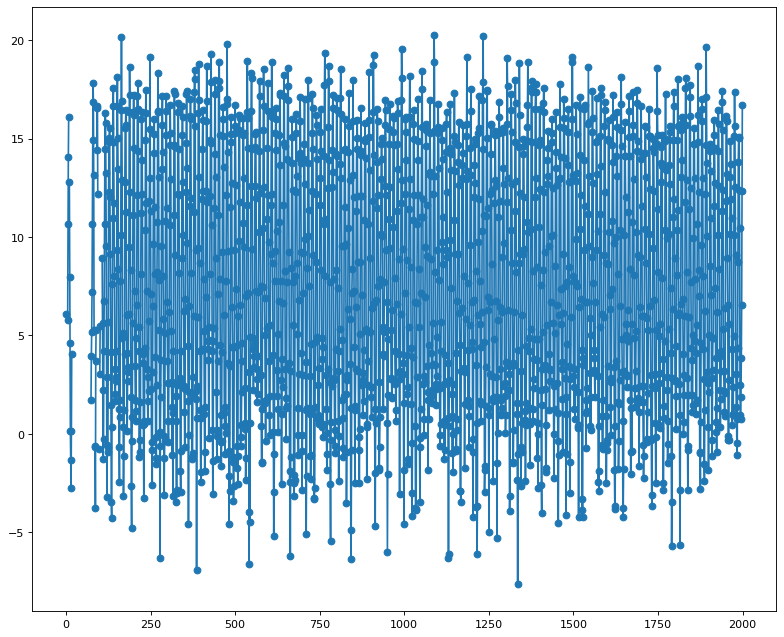

In [ ]:
show_graph(GlobalTempCity_df,'AverageTemperature' ,0, 2000)

In [ ]:
missing_city = GlobalTempCity_df.isnull().sum()[1]
missing_country = GlobalTempCountry_df.isnull().sum()[1]
missing_majorcity = GlobalTempMajorCity_df.isnull().sum()[1]
missing_state = GlobalTempState_df.isnull().sum()[1]

In [ ]:
print("GlobalTempCity_df \n",GlobalTempCity_df.isnull().sum())
print("GlobalTempCountry_df \n",GlobalTempCountry_df.isnull().sum())
print("GlobalTempMajorCity_df \n",GlobalTempMajorCity_df.isnull().sum())
print("GlobalTempState_df \n",GlobalTempState_df.isnull().sum())


GlobalTempCity_df 
 dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
GlobalTempCountry_df 
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64
GlobalTempMajorCity_df 
 dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64
GlobalTempState_df 
 dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country

In [ ]:
print("Missing Data Summary (% missing)")
data = {'GlobalTempCity':  [missing_city * 100/(len(GlobalTempCity_df))],
        'GlobalTempCountry': [missing_country * 100/(len(GlobalTempCountry_df))],
        'GlobalTempMajorCity': [missing_majorcity * 100/(len(GlobalTempMajorCity_df))],
        'GlobalTempState': [missing_state * 100/(len(GlobalTempState_df))],
        }

df = pd.DataFrame(data)

print(df)

Missing Data Summary (% missing)
   GlobalTempCity  GlobalTempCountry  GlobalTempMajorCity  GlobalTempState
0        4.234458           5.654225             4.599941         3.972277


## Missing Data Diagrams

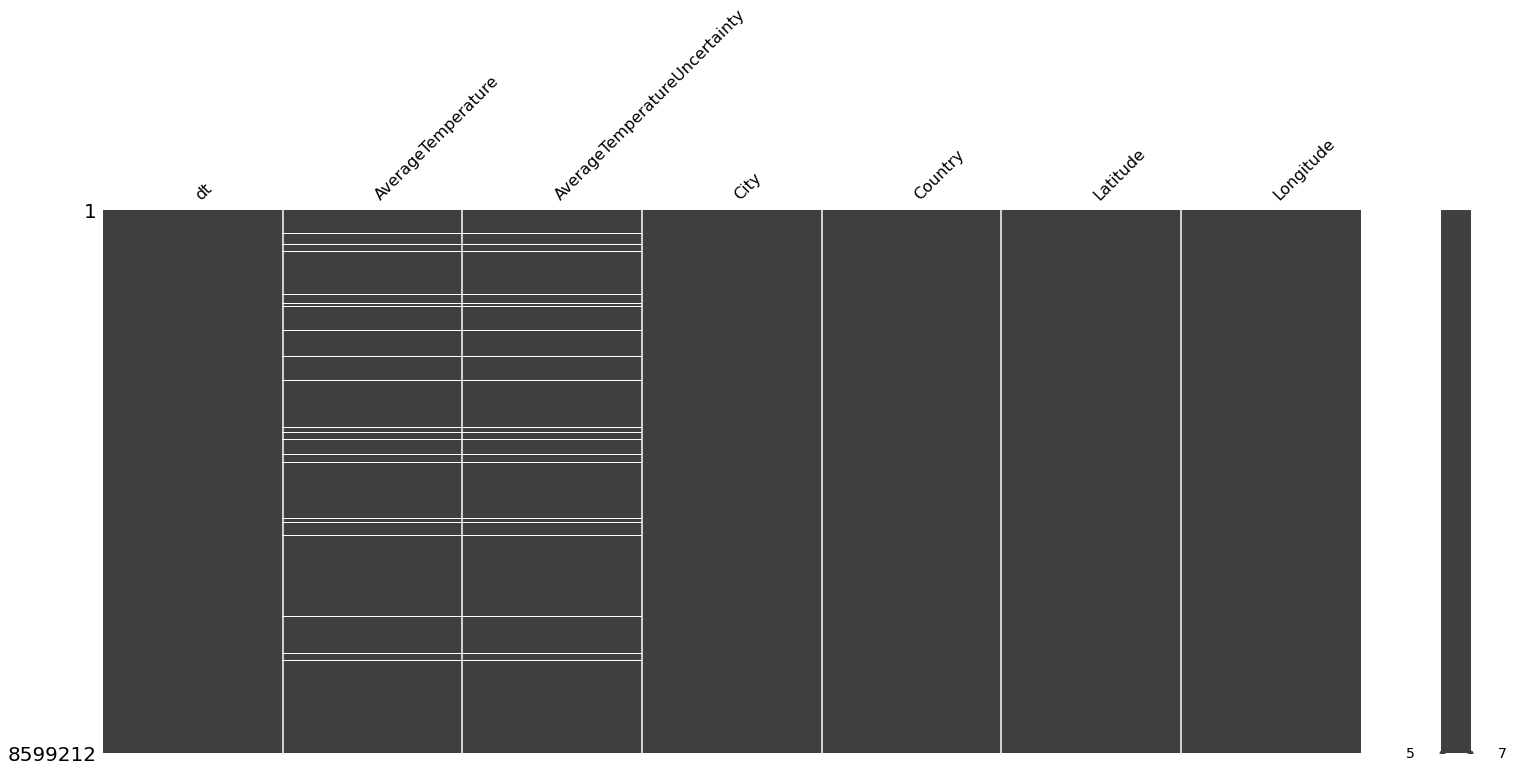

In [ ]:
msno.matrix(GlobalTempCity_df)

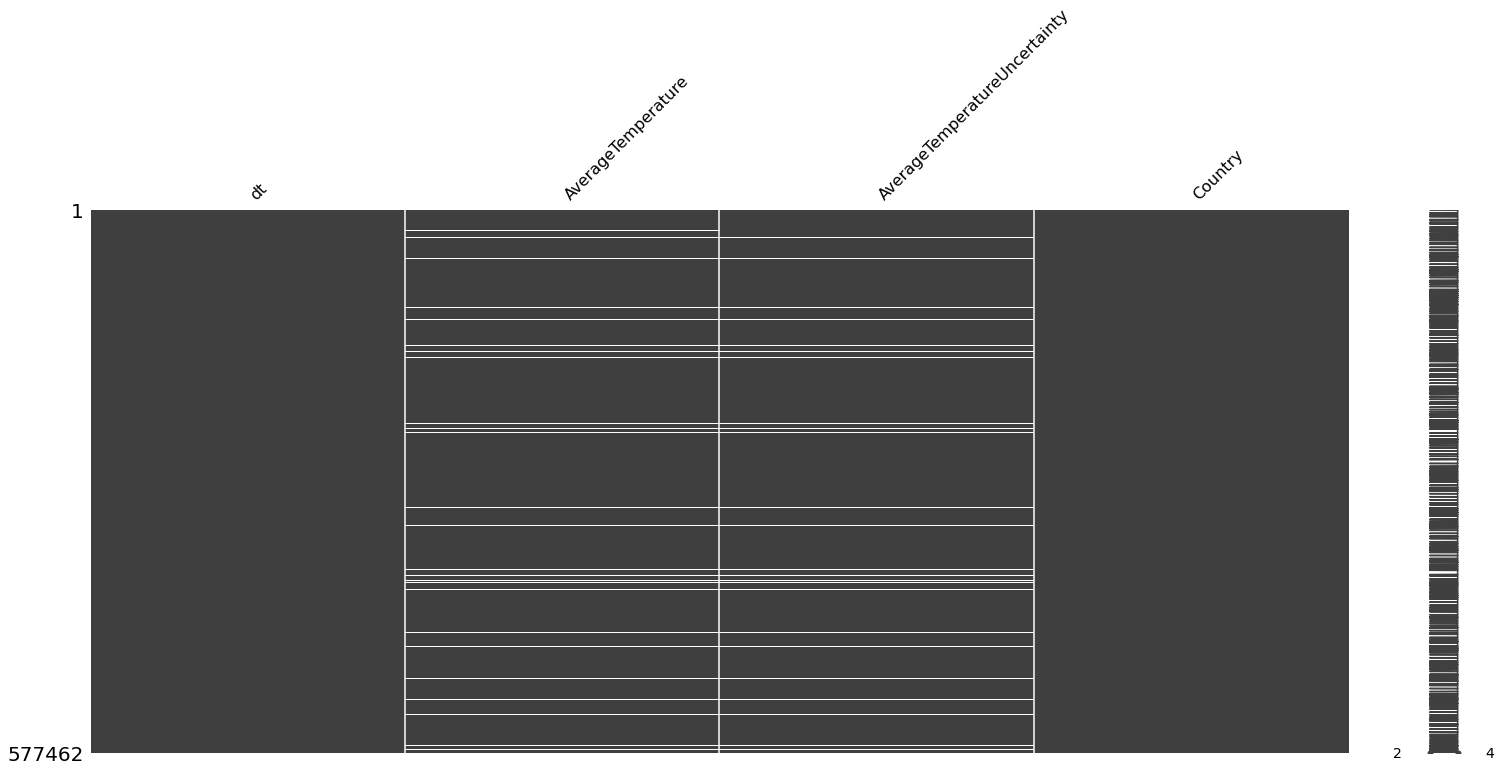

In [ ]:
msno.matrix(GlobalTempCountry_df)

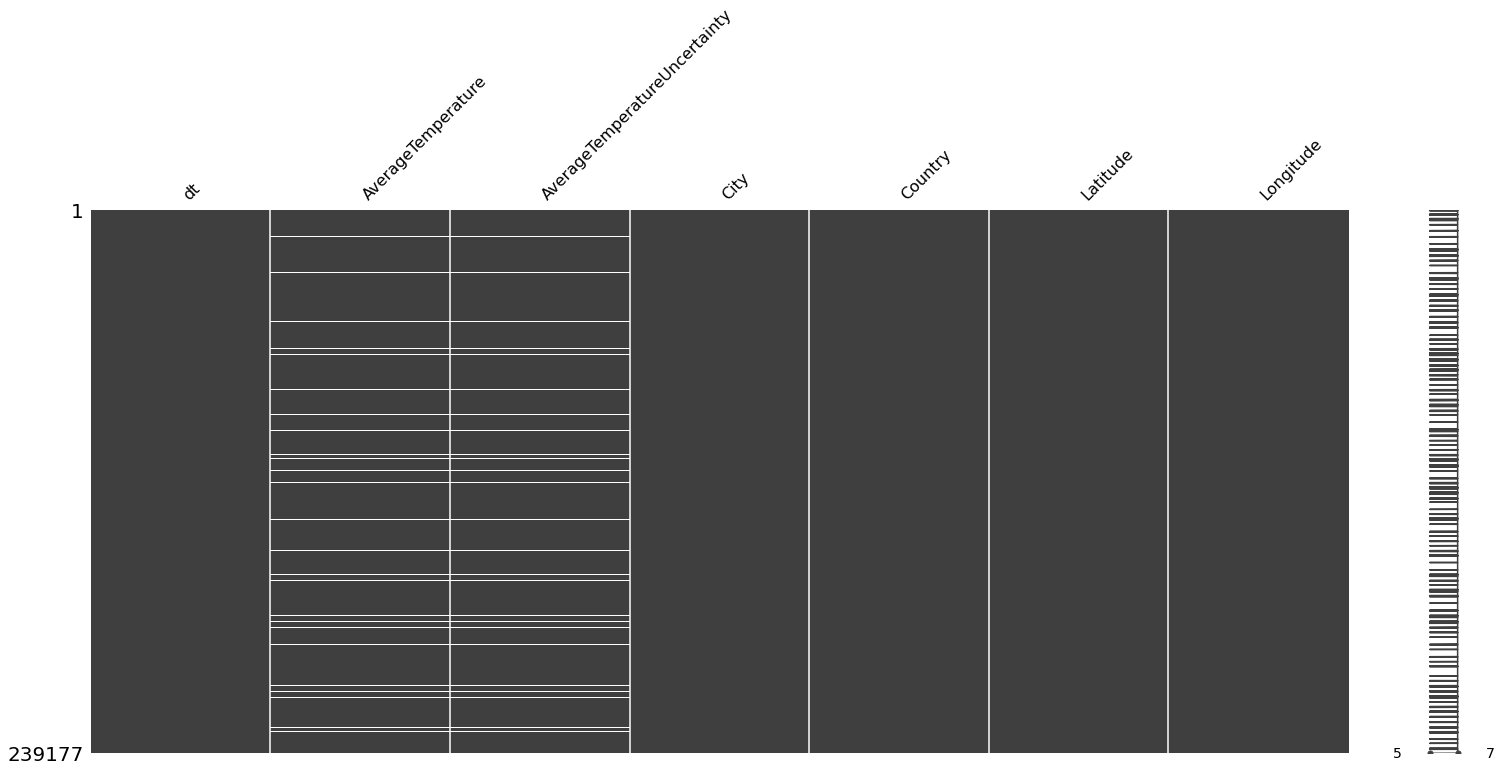

In [ ]:
msno.matrix(GlobalTempMajorCity_df)

## Data Cleaning - Climate Change Data

Here, we will perform the following:
1.   Data imputation with mean temperature in AverageTemperature
2.   Separate column dt into 'Year' 'Month', 'Day'
3.Drop columns: dt, and AverageTemperatureUncertainty

In [ ]:
GlobalTempCity_df['AverageTemperature'] = GlobalTempCity_df['AverageTemperature'].fillna(method='bfill')
GlobalTempCountry_df['AverageTemperature'] = GlobalTempCountry_df['AverageTemperature'].fillna(method='bfill')
GlobalTempMajorCity_df['AverageTemperature'] = GlobalTempMajorCity_df['AverageTemperature'].fillna(method='bfill')
GlobalTempState_df['AverageTemperature'] = GlobalTempState_df['AverageTemperature'].fillna(method='bfill')

In [ ]:
GlobalTempCity_df[["Year", "Month", "Day"]] = GlobalTempCity_df["dt"].str.split("-", expand=True)
GlobalTempCountry_df[["Year", "Month", "Day"]] = GlobalTempCountry_df["dt"].str.split("-", expand=True)
GlobalTempMajorCity_df[["Year", "Month", "Day"]] = GlobalTempMajorCity_df["dt"].str.split("-", expand=True)
GlobalTempState_df[["Year", "Month", "Day"]] = GlobalTempState_df["dt"].str.split("-", expand=True)

In [ ]:
GlobalTempCity_df = GlobalTempCity_df.drop(columns = ['dt', 'AverageTemperatureUncertainty'])
GlobalTempCountry_df = GlobalTempCountry_df.drop(columns = ['dt', 'AverageTemperatureUncertainty'])
GlobalTempMajorCity_df = GlobalTempMajorCity_df.drop(columns = ['dt', 'AverageTemperatureUncertainty'])
GlobalTempState_df = GlobalTempState_df.drop(columns = ['dt', 'AverageTemperatureUncertainty'])

In [ ]:
GlobalTempCity_df.head()

,AverageTemperature,City,Country,Latitude,Longitude,Year,Month,Day
0,6.068,Århus,Denmark,57.05N,10.33E,1743,11,01
1,5.788,Århus,Denmark,57.05N,10.33E,1743,12,01
2,5.788,Århus,Denmark,57.05N,10.33E,1744,01,01
3,5.788,Århus,Denmark,57.05N,10.33E,1744,02,01
4,5.788,Århus,Denmark,57.05N,10.33E,1744,03,01


In [ ]:
GlobalTempCountry_df.head()

,AverageTemperature,Country,Year,Month,Day
0,4.384,Åland,1743,11,01
1,1.530,Åland,1743,12,01
2,1.530,Åland,1744,01,01
3,1.530,Åland,1744,02,01
4,1.530,Åland,1744,03,01


In [ ]:
GlobalTempMajorCity_df.head()

,AverageTemperature,City,Country,Latitude,Longitude,Year,Month,Day
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01


In [ ]:
GlobalTempState_df.head()

,AverageTemperature,State,Country,Year,Month,Day
0,25.544,Acre,Brazil,1855,05,01
1,24.228,Acre,Brazil,1855,06,01
2,24.371,Acre,Brazil,1855,07,01
3,25.427,Acre,Brazil,1855,08,01
4,25.675,Acre,Brazil,1855,09,01


# 4-2. World Bank Data

## EDA And Cleaning

In [ ]:
wb_ClimateChangeData_df = pd.read_excel('/content/world_bank_data/climate-change-excel-4-6-mb-.xls', 'Data')
wb_ClimateChangeCountry_df = pd.read_excel('/content/world_bank_data/climate-change-excel-4-6-mb-.xls', 'Country')
wb_CountryTemperature_df = pd.read_excel('/content/world_bank_data/historical-data-excel-380-kb-.xls', 'Country_temperatureCRU')
wb_CountryPrecipitation_df = pd.read_excel('/content/world_bank_data/historical-data-excel-380-kb-.xls', 'Country_precipitationCRU')

In [ ]:
bset = set(wb_ClimateChangeCountry_df['Country name'])

In [ ]:
wb_ClimateChangeData_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


We want to extract certain types of data. So first, we want to map out the types of data we have.

In [ ]:
set(wb_ClimateChangeData_df["Series name"])

{'Access to electricity (% of total population)',
 'Access to improved sanitation (% of total pop.)',
 'Access to improved water source (% of total pop.)',
 'Agricultural land under irrigation (% of total ag. land)',
 'Annex-I emissions reduction target',
 'Annual freshwater withdrawals (% of internal resources)',
 'Average annual precipitation (1961-1990, mm)',
 'Average daily min/max temperature (1961-1990, Celsius)',
 'CO2 emissions per capita (metric tons)',
 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
 'CO2 emissions, total (KtCO2)',
 'Cereal yield (kg per hectare)',
 'Child malnutrition, underweight (% of under age 5)',
 'Disaster risk reduction progress score (1-5 scale; 5=best)',
 'Droughts, floods, extreme temps (% pop. avg. 1990-2009)',
 'Ease of doing business (ranking 1-183; 1=best)',
 'Energy use per capita (kilograms of oil equivalent)',
 'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
 'Foreign direct investment, net inflows (% of GDP)',


In [ ]:
lst1 = ['CO2 emissions per capita (metric tons)',
 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
 'CO2 emissions, total (KtCO2)',]
lst3 = ['Droughts, floods, extreme temps (% pop. avg. 1990-2009)',]
lst2 =   [
    'Issued Emission Reduction Units (ERUs) from JI (thousands)',
    'Hosted Clean Development Mechanism (CDM) projects',
  'Issued Certified Emission Reductions (CERs) from CDM (thousands)',]

In [ ]:
wb_CO2_df = wb_ClimateChangeData_df[wb_ClimateChangeData_df['Series name'].isin(lst1)]
wb_DroughtsFloodsExTemp_df = wb_ClimateChangeData_df[wb_ClimateChangeData_df['Series name'].isin(lst3)]
wb_res1_df = wb_ClimateChangeData_df[wb_ClimateChangeData_df['Series name'].isin(lst2)]

In [ ]:
print(set(wb_CO2_df['Series name']))
print(set(wb_DroughtsFloodsExTemp_df['Series name']))
print(set(wb_res1_df['Series name']))

{'CO2 emissions per capita (metric tons)', 'CO2 emissions, total (KtCO2)', 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)'}
{'Issued Emission Reduction Units (ERUs) from JI (thousands)', 'Issued Certified Emission Reductions (CERs) from CDM (thousands)', 'Hosted Clean Development Mechanism (CDM) projects'}
{'Droughts, floods, extreme temps (% pop. avg. 1990-2009)'}


### Table for 
CO2
### Columns

We will perform the following:


1.   Drop rows that do not have any relevant values.
2. Drop columns that do not contain any relevant values (column 2009, 2010, 2011)
2.   Impute data at the place that's missing.



In [ ]:
wb_CO2_filtered_df = wb_CO2_df[~wb_CO2_df.iloc[:, 6:].eq('..').all(axis=1)] #Drop rows that have all of yearly values missing.

In [ ]:
wb_CO2_filtered_df = wb_CO2_filtered_df.drop(columns=['SCALE','Decimals', 2009, 2010, 2011])

In [ ]:
wb_CO2_filtered_df = wb_CO2_filtered_df.replace('..', np.NaN)

In [ ]:
wb_CO2_filtered_df.isnull().sum()

Country code     0
Country name     0
Series code      0
Series name      0
1990            98
1991            96
1992            31
1993            30
1994            26
1995            20
1996            22
1997            18
1998            18
1999            14
2000            11
2001            10
2002             6
2003             6
2004             6
2005             0
2006             1
2007             1
2008             5
dtype: int64

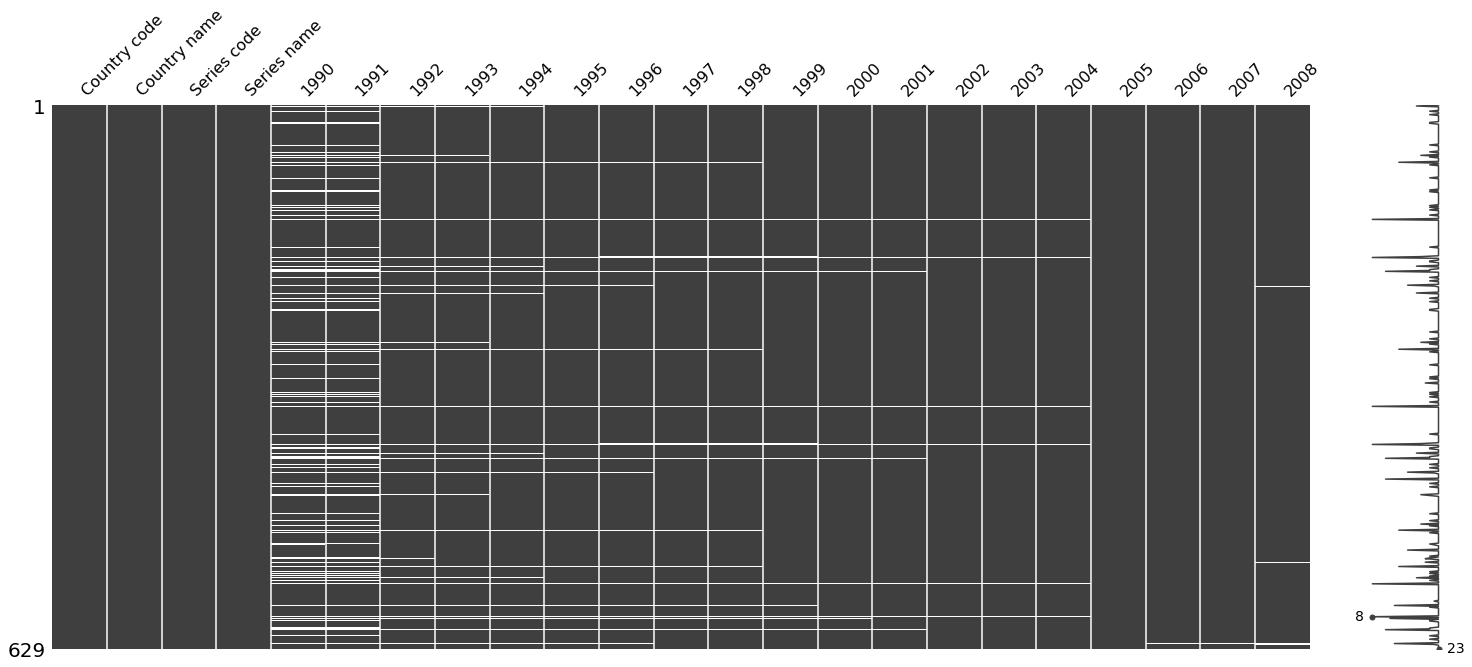

In [ ]:
msno.matrix(wb_CO2_filtered_df)

In [ ]:
wb_CO2_filtered_df = wb_CO2_filtered_df.fillna(method='bfill')

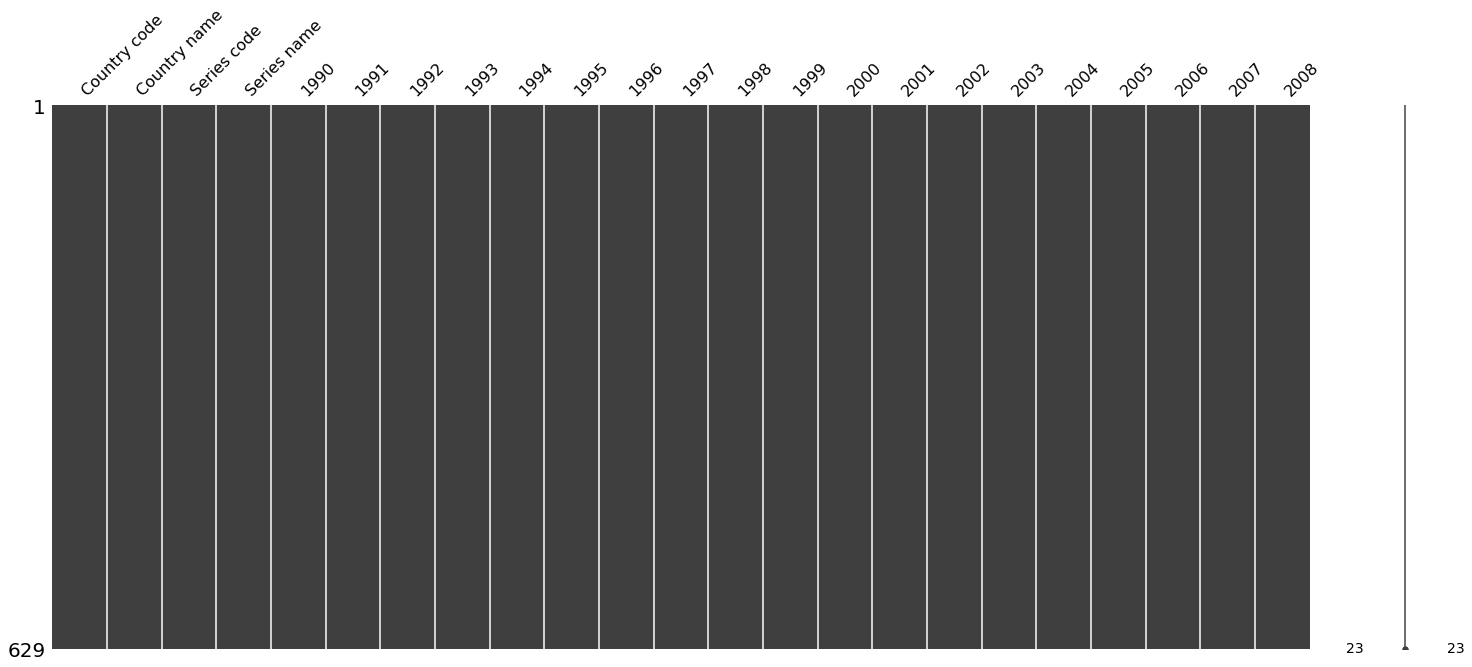

In [ ]:
msno.matrix(wb_CO2_filtered_df)

### Table for:
1.   Issued Emission Reduction Units (ERUs) from JI (thousands)
2.   Issued Certified Emission Reductions (CERs) from CDM (thousands)
3. Hosted Clean Development Mechanism (CDM) projects
4. Droughts, floods, extreme temps (% pop. avg. 1990-2009
### Columns:


1.   Country code
2.   Country name
3. Series code
4. Value
5. Year



In [ ]:
col_lst = [x for x in range(1990,2011)]
wb_res_df = wb_res1_df.drop(columns=col_lst)
wb_res_df = wb_res_df.drop(columns=['SCALE','Decimals'])
wb_res_df = wb_res_df.dropna()
# wb_res_df = wb_res_df.reset_index(drop=True)

In [ ]:
wb_res_df['Year'] = 2011
wb_res_df = wb_res_df.rename(columns = {2011: "Value"})
wb_res_df= wb_res_df[wb_res_df.Value != '..']
wb_res_df

,Country code,Country name,Series code,Series name,Value,Year
3732,ALB,Albania,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,1,2011
3733,ARE,United Arab Emirates,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,5,2011
3734,ARG,Argentina,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,24,2011
3735,ARM,Armenia,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,5,2011
3740,AZE,Azerbaijan,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,1,2011
...,...,...,...,...,...,...
4836,ROM,Romania,EN.CLC.IERU,Issued Emission Reduction Units (ERUs) from JI...,"2,405",2011
4837,RUS,Russian Federation,EN.CLC.IERU,Issued Emission Reduction Units (ERUs) from JI...,"7,211",2011
4854,SVK,Slovak Republic,EN.CLC.IERU,Issued Emission Reduction Units (ERUs) from JI...,0,2011
4856,SWE,Sweden,EN.CLC.IERU,Issued Emission Reduction Units (ERUs) from JI...,0,2011


In [ ]:
col_lst = [x for x in range(1990,2012)]
col_lst.pop(-3)
wb_DroughtsFloodsExtTemp_df = wb_DroughtsFloodsExTemp_df.drop(columns = col_lst)
wb_DroughtsFloodsExtTemp_df = wb_DroughtsFloodsExtTemp_df.drop(columns=['SCALE','Decimals'])
wb_DroughtsFloodsExtTemp_df = wb_DroughtsFloodsExtTemp_df.dropna()
# wb_DroughtsFloodsExtTemp_df = wb_DroughtsFloodsExtTemp_df.reset_index(drop=True)

In [ ]:
wb_DroughtsFloodsExtTemp_df['Year'] = 2009
wb_DroughtsFloodsExtTemp_df = wb_DroughtsFloodsExtTemp_df.rename(columns = {2009: "Value"})
wb_DroughtsFloodsExtTemp_df= wb_DroughtsFloodsExtTemp_df[wb_DroughtsFloodsExtTemp_df.Value != '..']
wb_DroughtsFloodsExtTemp_df

,Country code,Country name,Series code,Series name,Value,Year
4895,AFG,Afghanistan,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",1.05929,2009
4896,AGO,Angola,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",1.011765,2009
4897,ALB,Albania,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",5.269577,2009
4899,ARG,Argentina,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.16719,2009
4900,ARM,Armenia,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.478231,2009
...,...,...,...,...,...,...
5120,WSM,Samoa,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0,2009
5121,YEM,"Yemen, Rep.",EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.099411,2009
5122,ZAF,South Africa,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",1.805651,2009
5123,ZAR,"Congo, Dem. Rep.",EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.017891,2009


In [ ]:
wb_final_df = pd.concat([wb_res_df, wb_DroughtsFloodsExtTemp_df])

In [ ]:
wb_final_df

,Country code,Country name,Series code,Series name,Value,Year
3732,ALB,Albania,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,1,2011
3733,ARE,United Arab Emirates,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,5,2011
3734,ARG,Argentina,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,24,2011
3735,ARM,Armenia,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,5,2011
3740,AZE,Azerbaijan,EN.CLC.HCDM,Hosted Clean Development Mechanism (CDM) projects,1,2011
...,...,...,...,...,...,...
5120,WSM,Samoa,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0,2009
5121,YEM,"Yemen, Rep.",EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.099411,2009
5122,ZAF,South Africa,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",1.805651,2009
5123,ZAR,"Congo, Dem. Rep.",EN.CLC.MDAT.ZS,"Droughts, floods, extreme temps (% pop. avg. 1...",0.017891,2009


### Table for 
Country code, Country name, Capital city, and Region.
### Columns:
Country code, Country name, Capital city, and Region.

In [ ]:
wb_ClimateChangeCountry_df = wb_ClimateChangeCountry_df.drop(columns = ['Income group', 'Lending category'])

In [ ]:
wb_ClimateChangeCountry_df.head()

,Country code,Country name,Capital city,Region
0,EAP,East Asia & Pacific,..,Aggregates
1,ECA,Europe & Central Asia,..,Aggregates
2,EMU,Euro area,..,Aggregates
3,HIC,High income,..,Aggregates
4,LAC,Latin America & Caribbean,..,Aggregates


### Table for 
Monthyl Temperature in Each Country

In [ ]:
wb_CountryTemperature_df.head()

,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
0,AFG,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517,12.921455
1,AGO,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858,21.510933
2,ALB,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617,11.269800
3,ARE,18.427522,19.428044,22.612913,26.578435,30.623652,32.457087,33.796130,33.550869,31.743130,28.343218,24.061783,20.283739,26.825609
4,ARG,20.803533,19.899523,17.514634,14.046284,10.647732,7.657256,7.421399,9.015955,11.529476,14.674651,17.544032,19.828148,14.215225


In [ ]:
wb_CountryTemperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISO_3DIGIT   178 non-null    object 
 1   Jan_Temp     178 non-null    float64
 2   Feb_temp     178 non-null    float64
 3   Mar_temp     178 non-null    float64
 4   Apr_Temp     178 non-null    float64
 5   May_temp     178 non-null    float64
 6   Jun_Temp     178 non-null    float64
 7   July_Temp    178 non-null    float64
 8   Aug_Temp     178 non-null    float64
 9   Sept_temp    178 non-null    float64
 10  Oct_temp     178 non-null    float64
 11  Nov_Temp     178 non-null    float64
 12  Dec_temp     178 non-null    float64
 13  Annual_temp  178 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


### Table for
Monthly Precipitation in Each Country

In [ ]:
wb_CountryPrecipitation_df.head()

,ISO_3DIGIT,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip
0,AFG,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374,311.321856
1,AGO,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423,991.305683
2,ALB,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834,1053.235184
3,ARE,5.955387,22.178000,16.587609,8.961470,1.080574,1.094061,2.284059,1.405504,0.495943,0.428552,1.740576,5.600291,67.812025
4,ARG,68.370440,63.654088,69.531037,46.481148,36.282154,28.080046,25.894385,24.096768,30.073554,47.715487,55.566664,63.300102,559.045871


In [ ]:
wb_CountryPrecipitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO_3DIGIT     178 non-null    object 
 1   Jan_precip     178 non-null    float64
 2   Feb_precip     178 non-null    float64
 3   Mar_precip     178 non-null    float64
 4   Apr_precip     178 non-null    float64
 5   May_precip     178 non-null    float64
 6   Jun_precip     178 non-null    float64
 7   July_precip    178 non-null    float64
 8   Aug_precip     178 non-null    float64
 9   Sept_precip    178 non-null    float64
 10  Oct_precip     178 non-null    float64
 11  Nov_precip     178 non-null    float64
 12  Dec_precip     178 non-null    float64
 13  Annual_precip  178 non-null    float64
dtypes: float64(13), object(1)
memory usage: 19.6+ KB


## Fix inconsistent names

In [ ]:
set(list(aset) + list(bset))

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua And Barbuda',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic Of The)',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao'

In [ ]:
name_map = {
     'Antigua And Barbuda' :'Antigua and Barbuda',
     'Bahamas, The': 'Bahamas',
     'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
     'Congo (Democratic Republic Of The)':'Congo, Dem. Rep.',
     'Curaçao':'Curacao',
     "Côte D'Ivoire" : "Cote d'Ivoire",
     "Denmark (Europe)" : "Denmark",
     'Egypt, Arab Rep.' : "Egypt",
     "France (Europe)" : "France",
      'Gambia, The' : 'Gambia',
      'Guinea-Bissau': 'Guinea Bissau',
      'Hong Kong SAR, China' : 'Hong Kong',
      'Iran, Islamic Rep.' : 'Iran',
      'Isle Of Man' : 'Isle of Man',
      'Russian Federation': 'Russia',
      'Slovak Republic' : 'Slovakia',
      'Korea, Rep.' :'South Korea',
      'Korea, Dem. Rep.' : 'North Korea',
      'Kyrgyz Republic' : 'Kyrgyzstan',
      'Lao PDR' : 'Laos',
      'Macao SAR, China' : 'Macau',
      'Macedonia, FYR' :'Macedonia',
      'Netherlands (Europe)':'Netherlands',
      'Niger' : 'Nigeria',
      'Sao Tome And Principe': 'Sao Tome and Principe',
      'Slovak Republic' : 'Slovakia',
      'St. Martin (French part)': 'Saint Martin',
      'Saint Kitts And Nevis' : 'St. Kitts and Nevis',
      'Saint Lucia': 'St. Lucia',
      'Saint Vincent And The Grenadines': 'St. Vincent and the Grenadines',
      'Syrian Arab Republic' : 'Syria',
      'Timor-Leste': 'Timor Leste',
      'Trinidad And Tobago' :  'Trinidad and Tobago',
      'Turks And Caicas Islands' : 'Turks and Caicos Islands',
      'United Kingdom (Europe)' : 'United Kingdom',
      'Venezuela, RB' : 'Venezuela',
      'Virgin Islands (U.S.)': 'Virgin Islands',
      'Yemen, Rep.': 'Yemen',
}
name_series = pd.Series(data=list(name_map.values()), index=list(name_map.keys()))
name_series

Antigua And Barbuda                              Antigua and Barbuda
Bahamas, The                                                 Bahamas
Bosnia And Herzegovina                        Bosnia and Herzegovina
Congo (Democratic Republic Of The)                  Congo, Dem. Rep.
Curaçao                                                      Curacao
Côte D'Ivoire                                          Cote d'Ivoire
Denmark (Europe)                                             Denmark
Egypt, Arab Rep.                                               Egypt
France (Europe)                                               France
Gambia, The                                                   Gambia
Guinea-Bissau                                          Guinea Bissau
Hong Kong SAR, China                                       Hong Kong
Iran, Islamic Rep.                                              Iran
Isle Of Man                                              Isle of Man
Russian Federation                

In [ ]:
purge_list = list(name_map.keys())
GlobalTempCity_idx = GlobalTempCity_df.index[GlobalTempCity_df["Country"].isin(purge_list)]
GlobalTempCountry_idx = GlobalTempCountry_df.index[GlobalTempCountry_df["Country"].isin(purge_list)]
GlobalTempMajorCity_idx= GlobalTempMajorCity_df.index[GlobalTempMajorCity_df["Country"].isin(purge_list)]
GlobalTempState_idx = GlobalTempState_df.index[GlobalTempState_df["Country"].isin(purge_list)]
wb_CO2_filtered_idx = wb_CO2_filtered_df.index[wb_CO2_filtered_df["Country name"].isin(purge_list)]
wb_final_idx = wb_final_df.index[wb_final_df["Country name"].isin(purge_list)]
wb_ClimateChangeCountry_idx = wb_ClimateChangeCountry_df.index[wb_ClimateChangeCountry_df["Country name"].isin(purge_list)]

In [ ]:
GlobalTempCity_problems = GlobalTempCity_df.loc[GlobalTempCity_idx, "Country"]
GlobalTempCountry_problems = GlobalTempCountry_df.loc[GlobalTempCountry_idx, "Country"]
GlobalTempMajorCity_problems = GlobalTempMajorCity_df.loc[GlobalTempMajorCity_idx, "Country"]
GlobalTempState_problems = GlobalTempState_df.loc[GlobalTempState_idx, "Country"]

wb_CO2_filtered_problems = wb_CO2_filtered_df.loc[wb_CO2_filtered_idx, "Country name"]
wb_final_problems = wb_final_df.loc[wb_final_idx, "Country name"]
wb_ClimateChangeCountry_problems = wb_ClimateChangeCountry_df.loc[wb_ClimateChangeCountry_idx, "Country name"]


In [ ]:
GlobalTempCity_fixed = name_series.loc[GlobalTempCity_problems.values].values
GlobalTempCountry_fixed = name_series.loc[GlobalTempCountry_problems.values].values
GlobalTempMajorCity_fixed = name_series.loc[GlobalTempMajorCity_problems.values].values
GlobalTempState_fixed = name_series.loc[GlobalTempState_problems.values].values

wb_CO2_filtered_fixed = name_series.loc[wb_CO2_filtered_problems.values].values
wb_final_fixed = name_series.loc[wb_final_problems.values].values
wb_ClimateChangeCountry_fixed = name_series.loc[wb_ClimateChangeCountry_problems.values].values

In [ ]:
GlobalTempCity_df.loc[GlobalTempCity_idx, "Country"] = GlobalTempCity_fixed
GlobalTempCountry_df.loc[GlobalTempCountry_idx, "Country"] = GlobalTempCountry_fixed
GlobalTempMajorCity_df.loc[GlobalTempMajorCity_idx, "Country"] = GlobalTempMajorCity_fixed
GlobalTempState_df.loc[GlobalTempState_idx, "Country"] = GlobalTempState_fixed

wb_CO2_filtered_df.loc[wb_CO2_filtered_idx, "Country name"] = wb_CO2_filtered_fixed
wb_final_df.loc[wb_final_idx, "Country name"] = wb_final_fixed
wb_ClimateChangeCountry_df.loc[wb_ClimateChangeCountry_idx, "Country name"] = wb_ClimateChangeCountry_fixed


## Save Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/1 PENN/6 FA22/CIS550/Project/'
#Berkeley Climate Change data 
GlobalTempCity_df.to_csv(path + 'GlobalTempCity.csv')
GlobalTempCountry_df.to_csv(path + 'GlobalTempCountry.csv')
GlobalTempMajorCity_df.to_csv(path + 'GlobalTempMajorCity.csv')
GlobalTempState_df.to_csv(path + 'GlobalTempState.csv')
#World Bank Data
wb_CO2_filtered_df.to_csv(path + 'wb_CO2_filtered.csv')
wb_final_df.to_csv(path + 'wb_Res.csv')
wb_CountryTemperature_df.to_csv(path + 'wb_CountryTemp.csv')
wb_ClimateChangeCountry_df.to_csv(path + 'wb_CountryCode.csv')
wb_CountryPrecipitation_df.to_csv(path + 'wb_CountryPrec.csv')